In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Question 9

Pixels in an image can be transformed using transformation matrices. In R2, the standard basis vectors
are {[1, 0], [0, 1]}. The effect of a transformation matrix on any vector in R2 can be understood by
analyzing how the matrix acts on these basis vectors.

Consider the image shown below:

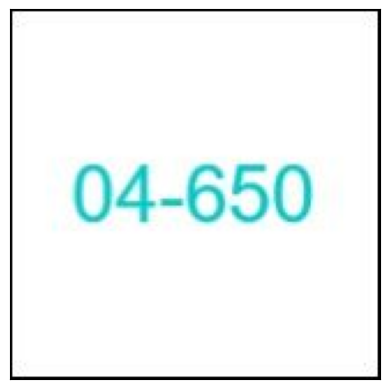

In [2]:
# loading and displaying image
img = plt.imread("04650.jpg")
img = np.array(img, dtype=np.uint8)
plt.imshow(img)
plt.yticks([]); plt.xticks([]);

This image has dimensions of 160x160 pixels.
By treating each pixel’s position as a vector relative to the image center, we obtain a total of 160×160 =
25, 600 vectors. To transform the image, a transformation matrix can be applied to all these vectors
simultaneously, changing their positions according to the specified transformation.
In this exercise, your task is to determine the appropriate transformation matrix for a given transformation
and implement it in code using NumPy and matplotlib to visualize the result.

In [3]:

def transform_image(image, A):
    # extract each pixel position as a vector relative to the center
    # and store the corresponding color
    height, width, c = img.shape
    vectors =  []
    colors = []
    for j in range(height):
        for i in range(width):
            # TODO append the color from the image
            # you can use .append
            colors.append(img[j,i])
            

            # TODO append the centered pixel position
            vectors.append([i-width/2, j-height/2])
            


    # apply your transformation matrix, A, to the pixel positions
    # TODO
    vectors = np.array(vectors).T
    transformed_vectors = np.dot(A, vectors)
    


    # place the colors of the transformed vectors in the correct position in the image
    transformed_img = np.ones_like(img)*255 # an all white image
    for k, (i,j) in enumerate(zip(*transformed_vectors)):
        # TODO
        i = int(i + width/2)
        j = int(j + height/2)
        if 0 <= i < width and 0 <= j < height:
            transformed_img[j, i] = colors[k]

    # display the transformed image
    plt.imshow(transformed_img, cmap="gray")
    plt.xticks([]); plt.yticks([]);



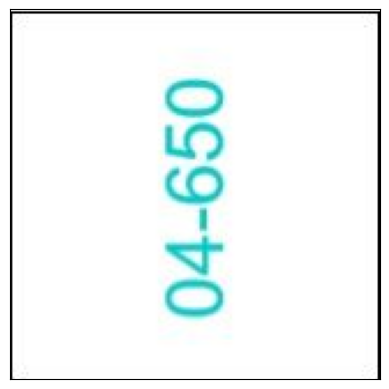

In [4]:
# (a) create transformation matrix that realizes the proposed transformation 
# and call the function you implemented above.
A = np.array([
    [0, 1],
    [-1, 0]
])
transform_image(img, A)

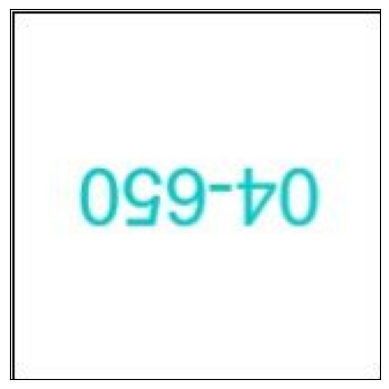

In [5]:
# (b) create transformation matrix that realizes the proposed transformation 
# and call the function you implemented above.

A = np.array([
    [-1, 0],
    [0, -1]
])
transform_image(img, A)

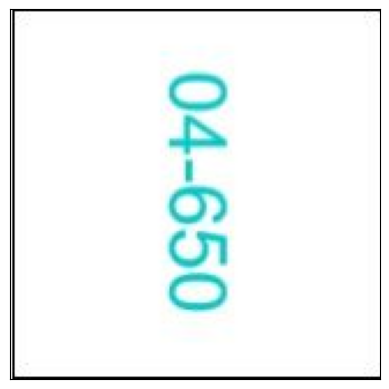

In [6]:
# (c) create transformation matrix that realizes the proposed transformation 
# and call the function you implemented above.

A = np.array([
    [0, -1],
    [1, 0]
])
transform_image(img, A)

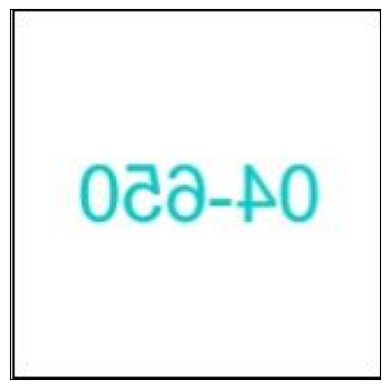

In [7]:
# (d) create transformation matrix that realizes the proposed transformation 
# and call the function you implemented above.

A = np.array([
    [-1, 0],
    [0, 1]
])
transform_image(img, A)

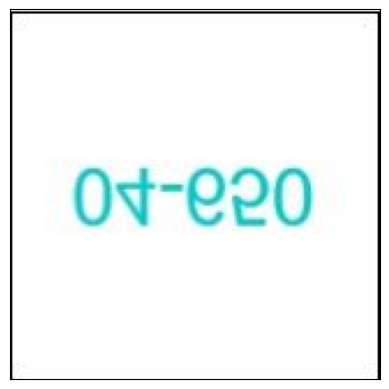

In [8]:
# (e) create transformation matrix that realizes the proposed transformation 
# and call the function you implemented above.

A = np.array([
    [1, 0],
    [0, -1]
])
transform_image(img, A)

# Question 10

Included in the handout is a 160×160 matrix, A. Observing A, you will notice that most of the rows
are linearly dependent. In class, you were introduced to the concept of low rank approximation. In
this exercise, you will approximate A as a product of two matrices, B and C. The matrix C contains
linearly independent rows of A while the rows of B contain scalars for linearly combining the rows of
C to obtain the rows of A.

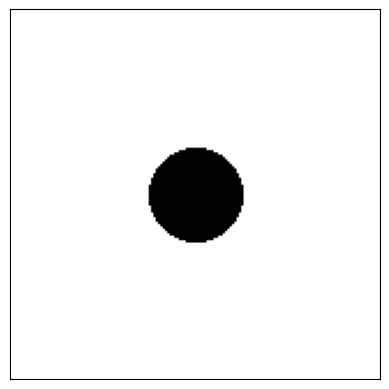

In [9]:
img = plt.imread("04650_1.jpg")[:,:,0] # read as grayscale
img = np.array(img, dtype=np.uint8)

A = (img > 100)*1 # make values to be in {0,1}

plt.imshow(A, cmap="gray")
plt.yticks([]); plt.xticks([]);

In [11]:
height, width = A.shape
B = None
C = None

# obtain C, containing linear independent rows of A
# TODO
def get_linearly_independent_rows(A):
    # get the QR decomposition of the transpose of A
    Q, R = np.linalg.qr(A.T)
    # Find the pivot columns by checking where the diagonal elements of R are non-zero
    pivots = np.where(np.abs(np.diag(R)) > 1e-10)[0]
    # Select the rows corresponding to the pivot columns
    C = A[pivots]
    return C

C = get_linearly_independent_rows(A)

# obtain B, containing coefficients used to linearly combine the rows of C
# to obtain the rows of A
# TODO
def get_coefficients(C, A):
    B = np.linalg.lstsq(C.T, A.T, rcond=None)[0].T
    return B
B = get_coefficients(C, A)



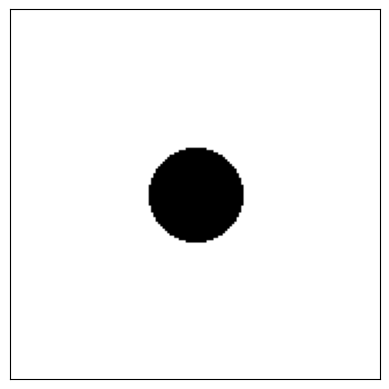

In [12]:
# display the result
plt.imshow(B.dot(C), cmap="gray")
plt.yticks([]); plt.xticks([]);